<a href="https://colab.research.google.com/github/yttehs123/Coppernicus_project_zwolle/blob/main/Senshagen_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

### Importing the training set

In [4]:
dataset_train = pd.read_csv("no2.csv")



# Cleaning the data

In [7]:
col_to_remove_no2 =('wkt_geom', 'id', 'timestam_1', 'unit_NO2', 'unit_PM10', 'unit_RH', 'unit_P', 'value_PM10', 'value_RH', 'value_P')
for name in col_to_remove_no2:
  if name in dataset_train.columns:
    dataset_train = dataset_train.drop(name,1)


dates=[]
for i in range(len(dataset_train)):
  dates.append(dataset_train['timestamp_'][i])

cleaned_dates_no2=[]
for date in dates:
  value = dt.datetime.strptime(date, '%Y-%m-%d')
  cleaned_dates_no2.append(value)
dates=[] #emptying list

dataset_train['dates'] = cleaned_dates_no2

In [134]:
##creating list of dataframes for each no2 sensor
no2_sensors = dataset_train.label.unique()

dataset_per_no2_sensor =[] #list of dataframes for each NO2 sensor

for sensor in no2_sensors:
  dataset_per_no2_sensor.append(dataset_train.loc[dataset_train['label'] == sensor])

print(dataset_per_no2_sensor[0])

        label  timestamp_  value_NO2      dates
0       PZ001  2018-05-31    48.2300 2018-05-31
1       PZ001  2018-05-31    33.9000 2018-05-31
2       PZ001  2018-05-31    33.9000 2018-05-31
3       PZ001  2018-05-31    17.4800 2018-05-31
4       PZ001  2018-05-31    17.4800 2018-05-31
...       ...         ...        ...        ...
68603   PZ001  2018-12-23    23.8244 2018-12-23
68619   PZ001  2018-12-23    23.8244 2018-12-23
72272   PZ001  2018-12-23    23.8244 2018-12-23
72291   PZ001  2018-12-23    23.8244 2018-12-23
113389  PZ001  2018-12-23    23.8244 2018-12-23

[3618 rows x 4 columns]


In [135]:
#CHECKING AND MITIGATING FOR NAN VALUES
window_size = 20 #select a window size to calculate average values for cells with no data
count =0
for dataset in dataset_per_no2_sensor: 
  for r in range(len(dataset)):
    if np.isnan(dataset.iloc[r,2]):
      count+=1
     # print(np.isnan(dataset.iloc[r,2]))
      window = range(window_size, -window_size)
      mean_values=[]
      for w in window:
        if dataset.iloc[r+w,2] >=0:
          mean_values.append(dataset.iloc[r+w,2])
        if len(mean_values)!=0:
          mean = (sum(mean_values))/len(mean_values)
          dataset.iloc[r,2]=mean
    if np.isnan(dataset.iloc[r,2]) :
      mean = dataset['value_NO2'].mean()
      dataset.iloc[r,2] = mean

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


4046


In [ ]:
#break into test and train dataset

no2_train=[]
no2_test=[]
train_split_ratio = 0.8
for dataset in dataset_per_no2_sensor:
  print(dataset.isnull().any())
  train_len = int(train_split_ratio*len(dataset))
  test_len = len(dataset) - train_len

  no2_train.append(dataset[:train_len])
  no2_test.append(dataset[train_len:-1])



range(0, 20)
range(0, 20)


[[0.61415525]
 [0.42170293]
 [0.42170293]
 ...
 [0.40357239]
 [0.39833468]
 [0.35616438]]
2894
Epoch 1/50
86/86 [==============================] - 17s 193ms/step - loss: 0.0145
Epoch 2/50
86/86 [==============================] - 17s 197ms/step - loss: 0.0113
Epoch 3/50
86/86 [==============================] - 18s 207ms/step - loss: 0.0111
Epoch 4/50
86/86 [==============================] - 17s 203ms/step - loss: 0.0115
Epoch 5/50
86/86 [==============================] - 18s 206ms/step - loss: 0.0106
Epoch 6/50
86/86 [==============================] - 18s 206ms/step - loss: 0.0102
Epoch 7/50
86/86 [==============================] - 18s 206ms/step - loss: 0.0101
Epoch 8/50
86/86 [==============================] - 18s 206ms/step - loss: 0.0096
Epoch 9/50
86/86 [==============================] - 18s 208ms/step - loss: 0.0095
Epoch 10/50
86/86 [==============================] - 18s 209ms/step - loss: 0.0092
Epoch 11/50
86/86 [==============================] - 18s 207ms/step - loss: 0.0092
E

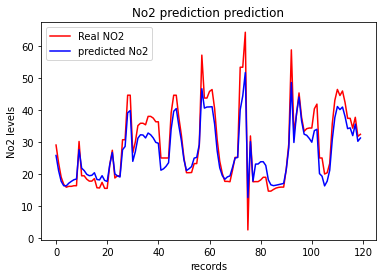

[[0.1992395 ]
 [0.20329338]
 [0.21795889]
 ...
 [0.20803523]
 [0.19651863]
 [0.1806465 ]]
5913
Epoch 1/50
181/181 [==============================] - 36s 202ms/step - loss: 0.0084
Epoch 2/50
181/181 [==============================] - 37s 204ms/step - loss: 0.0071
Epoch 3/50
 31/181 [====>.........................] - ETA: 29s - loss: 0.0077

KeyboardInterrupt: ignored

In [160]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding
from keras.regularizers import l2
from tensorflow.keras import activations

for i in range(len(no2_train)):
  training_set = no2_train[i]
  training_set= training_set.iloc[:,2:3].values


  test_set = no2_test[i]
  test_set= test_set.iloc[:,2:3].values

  sc = MinMaxScaler(feature_range=(0,1))
  training_set_sc = sc.fit_transform(training_set)  

  print(training_set_sc)
  print(len(training_set_sc))

  x_train=[]
  y_train=[]
  for x in range(144, len(training_set)): 
    x_train.append(training_set_sc[x-144:x,0])#should make 1198 records:60 columns
    y_train.append(training_set_sc[x,0])
  x_train, y_train = np.array(x_train), np.array(y_train)

  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))# shape - batch_size, timestep, number of indicators

  RNNregressor = Sequential()

  RNNregressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
  RNNregressor.add(Dropout(0.2))##20% dropout

  RNNregressor.add(LSTM(units=50, return_sequences=True))
  RNNregressor.add(Dropout(0.2))##20% dropout

  RNNregressor.add(LSTM(units=50, return_sequences=True))
  RNNregressor.add(Dropout(0.2))##20% dropout

  RNNregressor.add(LSTM(units=50))
  RNNregressor.add(Dropout(0.2))##20% dropout

  RNNregressor.add(Dense(units=1))

  RNNregressor.compile(optimizer = 'Adam', loss = 'mean_squared_error')#experiment with different optimizeers

  RNNregressor.fit(x=x_train, y = y_train, epochs = 50, batch_size = 32 )

  dataset_concat=dataset_per_no2_sensor[i]
  dataset_concat = dataset_concat.iloc[:,2:3]


  inputs = dataset_concat[len(dataset_concat)-len(test_set)-144 : ].values

  inputs = inputs.reshape(-1,1)

  inputs = sc.transform(inputs)

  x_test=[]
  for y in range(144, 144+120): #create upper bound for 20 financial days of jab 2k17, using timestep = 60
    x_test.append(inputs[y-144:y,0])#should make 1198 records:60 columns
  
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))# shape - batch_size, timestep, number of indicators

  predicted_stock_price = RNNregressor.predict(x_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)

  plt.plot(test_set[0:120], color ='red', label = "Real NO2")
  plt.plot(predicted_stock_price, color ='blue', label = "predicted No2")

  plt.title('No2 prediction prediction')
  plt.xlabel('records')
  plt.ylabel('No2 levels')
  plt.legend()
  plt.show()


  

# Use range for columns to ensure the right shape of the data for the np array --- all rows:one column
#we use the open column to decide the trends of the data